In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import scipy as sp

from model import build_system

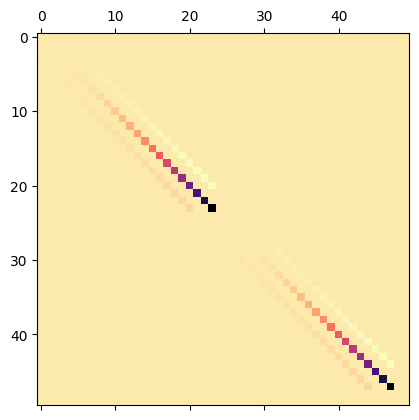

In [7]:
dim = 24
L = build_system(1., 0.6, 1.3755952741694344, 0.4, 3, 3, dim=dim)
plt.matshow((np.real(L.data.toarray())[:50, :50]), cmap='magma')
plt.show()

(64, 64)


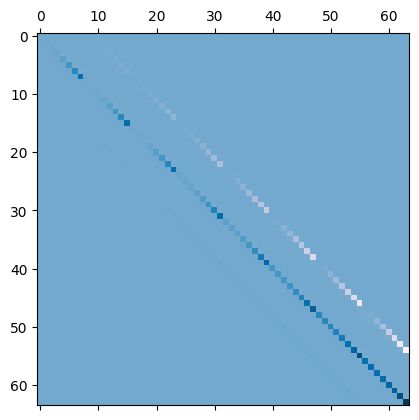

In [9]:
lim = dim // 3
B = np.zeros((lim**2, lim**2), dtype=complex)
for j in range(3):
    k = j
    for a in range(lim):
        for b in range(lim):
            for c in range(lim):
                for d in range(lim):
                    B[a * lim + b, c * lim + d] += L.data[(3 * a + j) * dim + (3 * b + k), (3 * c + j) * dim + (3 * d + k)]
print(B.shape)
plt.matshow(np.real(B), cmap='PuBu_r')
plt.show()

In [10]:
evals, evecs = sp.linalg.eig(B)
order = np.argsort(evals)
evals = evals[order]
evecs = evecs[order]
eops = []
for evec in evecs:
    evec = qt.vec2mat(evec)
    eop = np.zeros((dim, dim), dtype='complex')
    eop[:evec.shape[0], :evec.shape[1]] = evec[:, :]
    eops.append(qt.Qobj(eop))
print(evals)

[-1.63471565e+04+2.73701638e-15j -1.39093191e+04-3.33435659e-13j
 -1.34835821e+04-2.18714127e-13j -1.14614314e+04+2.75580772e-12j
 -1.14373439e+04-1.67536696e-12j -1.05929756e+04+3.24307261e-13j
 -9.96036982e+03+1.05660812e+01j -9.96036982e+03-1.05660812e+01j
 -9.05389713e+03-1.39097962e+01j -9.05389713e+03+1.39097962e+01j
 -8.58560314e+03+1.59635515e+01j -8.58560314e+03-1.59635515e+01j
 -8.46142928e+03-2.37739117e+01j -8.46142928e+03+2.37739117e+01j
 -8.37721607e+03-2.45134047e+00j -8.37721607e+03+2.45134047e+00j
 -8.37191060e+03-2.64239201e+01j -8.37191060e+03+2.64239201e+01j
 -6.88763154e+03+7.07145704e+00j -6.88763154e+03-7.07145704e+00j
 -6.15828809e+03-2.76278974e-12j -5.98127165e+03+1.07762229e+01j
 -5.98127165e+03-1.07762229e+01j -5.51229077e+03-1.43202178e+01j
 -5.51229077e+03+1.43202178e+01j -5.33573633e+03+1.75966491e+01j
 -5.33573633e+03-1.75966491e+01j -5.30607583e+03+2.21553016e+01j
 -5.30607583e+03-2.21553016e+01j -4.66881395e+03-3.02980854e+00j
 -4.66881395e+03+3.029808

(<Figure size 600x600 with 1 Axes>,
 <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

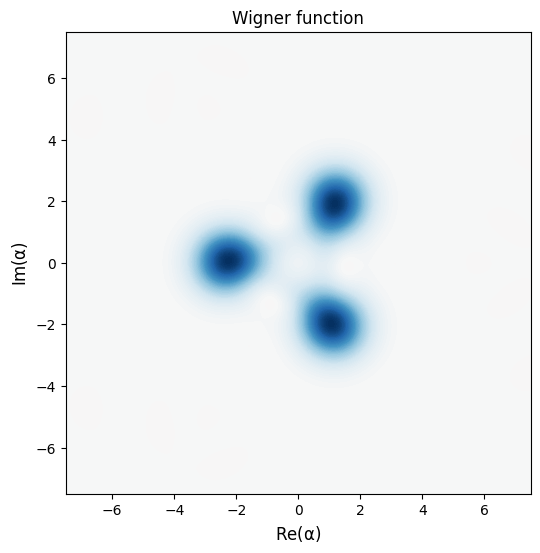

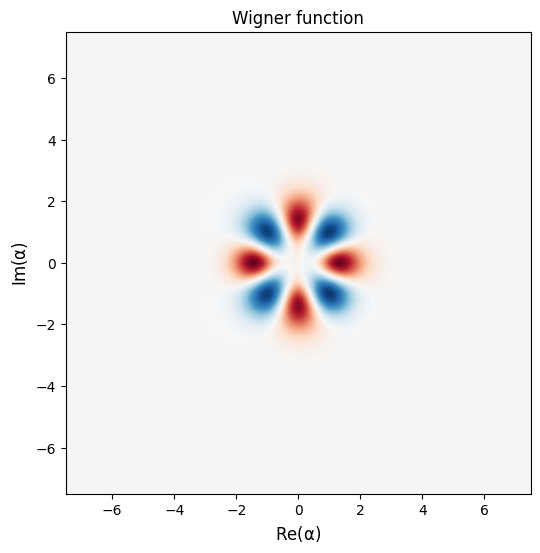

In [11]:
ss = qt.steadystate(L)
qt.plot_wigner(ss)
qt.plot_wigner(eops[0])

ValueError: cannot reshape array of size 208 into shape (14,14)

In [8]:
L[-1]

array([[    0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j,     0.       +0.j,     0.       +0.j,
            0.       +0.j